In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

from math import pi

pd.set_option('display.max_columns', None)

In [37]:
df = pd.read_csv('dataset/marketing_campaign.csv', sep='\t')
cleaned_df = pd.read_csv('dataset/marketing_campaign_clean.csv')

In [38]:
cleaned_df.head(3)

,education,income,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,mnt_sweet,mnt_gold,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,has_partner,age,children,monetary,num_total_purchases,total_accepted_cmp,frequency,avg_purchase_value
0,Graduate,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,No,67,0,1617,25,0,2.083333,64.680000
1,Graduate,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,No,70,2,27,6,0,0.600000,4.500000
2,Graduate,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,Yes,59,0,776,21,0,1.909091,36.952381


### Feature Engineering

In [39]:
df2 = cleaned_df.copy()

#### Encoding categorical features

In [40]:
cat = (df2.dtypes == 'object')
object_cols = list(cat[cat].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['education', 'has_partner']


In [41]:
education_mapping = {
    "Undergraduate": 0,
    "Graduate": 1,
    "Postgraduate": 2
}
df2.education = df2.education.map(education_mapping)

In [42]:
has_partner_mapping = {
    "No": 0,
    "Yes": 1,
}
df2.has_partner = df2.has_partner.map(has_partner_mapping)

In [43]:
le = LabelEncoder()
for i in object_cols:
    df2[i] = df2[[i]].apply(le.fit_transform)

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   education              2229 non-null   int64  
 1   income                 2229 non-null   float64
 2   recency                2229 non-null   int64  
 3   mnt_wines              2229 non-null   int64  
 4   mnt_fruits             2229 non-null   int64  
 5   mnt_meat               2229 non-null   int64  
 6   mnt_fish               2229 non-null   int64  
 7   mnt_sweet              2229 non-null   int64  
 8   mnt_gold               2229 non-null   int64  
 9   num_deals_purchases    2229 non-null   int64  
 10  num_web_purchases      2229 non-null   int64  
 11  num_catalog_purchases  2229 non-null   int64  
 12  num_store_purchases    2229 non-null   int64  
 13  num_web_visits_month   2229 non-null   int64  
 14  acceptedcmp3           2229 non-null   int64  
 15  acce

In [45]:
df2.fillna(df2.mean(), inplace=True)

#### Dropping features

In [46]:
to_del = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'complain', 'response', 'total_accepted_cmp', 'num_total_purchases']
df2 = df2.drop(to_del, axis=1)

#### Standardazing the features

In [47]:
to_scale = [
    "income",
    "recency",
    "mnt_wines",
    "mnt_fruits",
    "mnt_meat",
    "mnt_fish",
    "mnt_sweet",
    "mnt_gold",
    "num_deals_purchases",
    "num_web_purchases",
    "num_catalog_purchases",
    "num_store_purchases",
    "num_web_visits_month",
    "age",
    "children",
    "monetary",
    "frequency",
    "avg_purchase_value",
]
scaler = StandardScaler()

scaler.fit(df2)

scaled_df = pd.DataFrame(scaler.transform(df2), columns=df2.columns)

# scaled_df = pd.concat([scaled_df, df2.drop(to_scale, axis=1)], axis=1)

In [48]:
scaled_df.sample(5)

,education,income,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,mnt_sweet,mnt_gold,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,has_partner,age,children,monetary,frequency,avg_purchase_value
2081,1.125153,0.084391,-1.627725,-0.225704,-0.486694,-0.115301,-0.505455,-0.584604,-0.635817,2.469949,0.324327,-0.585437,0.674868,0.689920,-1.345676,-0.436681,1.393978,-0.342057,0.812258,-0.316074
1886,-0.409710,-0.119865,-0.694759,-0.543507,-0.134538,-0.557643,-0.231173,-0.415235,-0.559011,-0.168815,-0.396436,-0.585437,0.057854,0.275745,-1.345676,1.699195,0.063851,-0.614982,-0.381731,-0.302320
644,-0.409710,0.740759,-0.729314,0.029727,-0.562156,-0.470998,0.061395,0.092875,1.956371,-0.168815,1.045090,-0.585437,0.366361,-0.138430,0.743121,0.930280,0.063851,-0.010885,0.281596,0.043568
2075,1.125153,0.030025,0.894737,0.674243,2.506630,1.480778,2.310505,2.391466,1.572343,-0.696567,0.324327,0.845417,1.600389,-1.795129,-1.345676,2.211805,-1.266277,1.595046,0.944924,0.840172
952,1.125153,0.126631,-0.038228,-0.112839,-0.587310,-0.616926,-0.615167,-0.657191,0.247447,0.886691,0.324327,-0.227723,-0.250653,0.275745,-1.345676,1.015715,0.063851,-0.406960,0.148931,-0.237983


#### Applying PCA

In [49]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_columns = ["PC1", "PC2", "PC3"]
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=pca_columns)
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2229.0,-5.419124e-17,2.854132,-4.992831,-2.691055,-0.674355,2.519725,8.604784
PC2,2229.0,-1.912632e-17,1.446250,-9.396447,-1.035382,-0.226825,0.882802,5.858321
PC3,2229.0,-5.100352e-17,1.157884,-4.758807,-0.757341,-0.001140,0.844203,4.455516


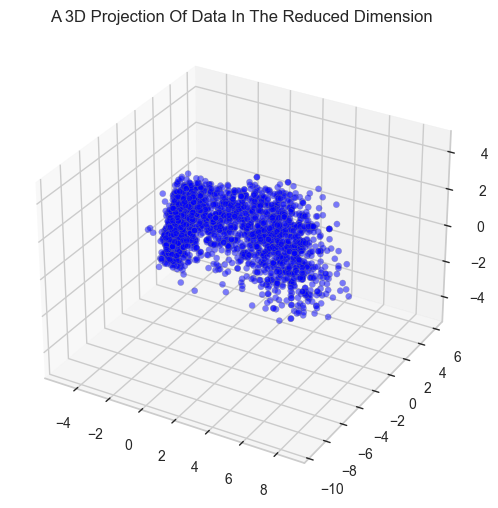

In [50]:
x = PCA_df[pca_columns[0]]
y = PCA_df[pca_columns[1]]
z = PCA_df[pca_columns[2]]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="blue", alpha=0.5, edgecolors="grey", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### Clustering Model

#### Selecting the number of clusters

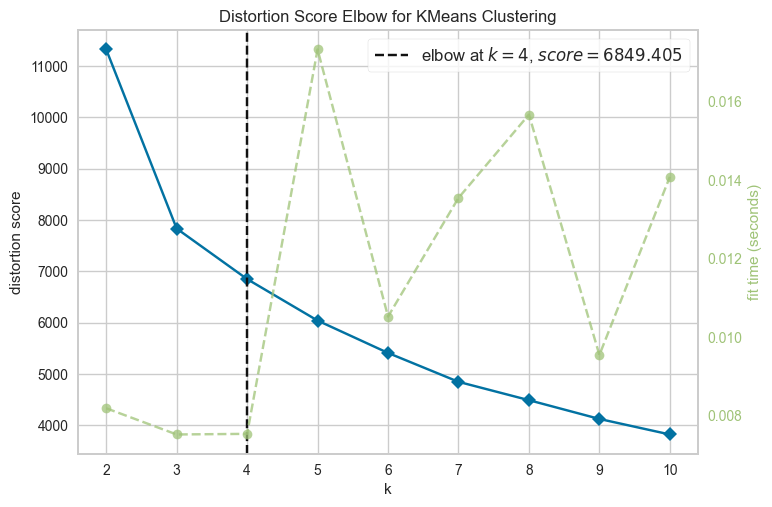

In [51]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10, n_init=100, init='k-means++')
Elbow_M.fit(PCA_df)
Elbow_M.show()
plt.show()

#### Creating the KMeans model

In [52]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=100, init='k-means++')
cluster_labels = kmeans.fit_predict(PCA_df)

In [53]:
PCA_df["clusters"] = cluster_labels
cleaned_df["clusters"] = cluster_labels
df2["clusters"] = cluster_labels
scaled_df["clusters"] = cluster_labels

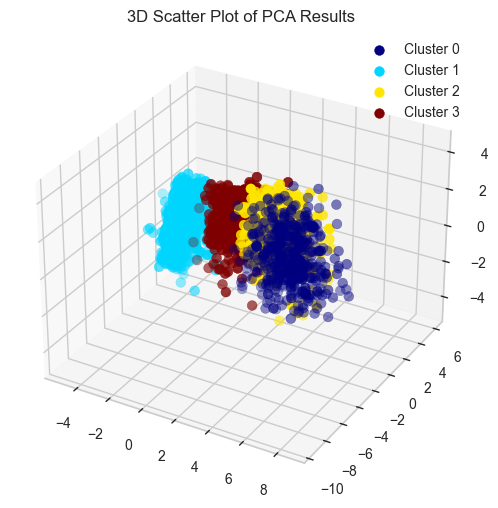

In [54]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = PCA_df[pca_columns[0]]
y = PCA_df[pca_columns[1]]
z = PCA_df[pca_columns[2]]

clusters = PCA_df['clusters'].unique()

colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))

for cluster, color in zip(clusters, colors):
    ix = PCA_df['clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)
    
ax.set_title('3D Scatter Plot of PCA Results')
ax.legend()
plt.show()

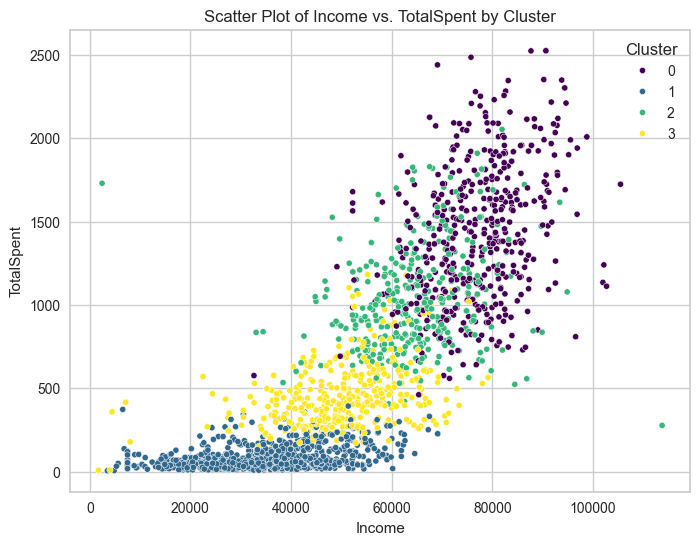

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='monetary', hue='clusters', data=cleaned_df, palette='viridis', s=20)

plt.title('Scatter Plot of Income vs. TotalSpent by Cluster')
plt.xlabel('Income')
plt.ylabel('TotalSpent')
plt.legend(title='Cluster')
plt.show()

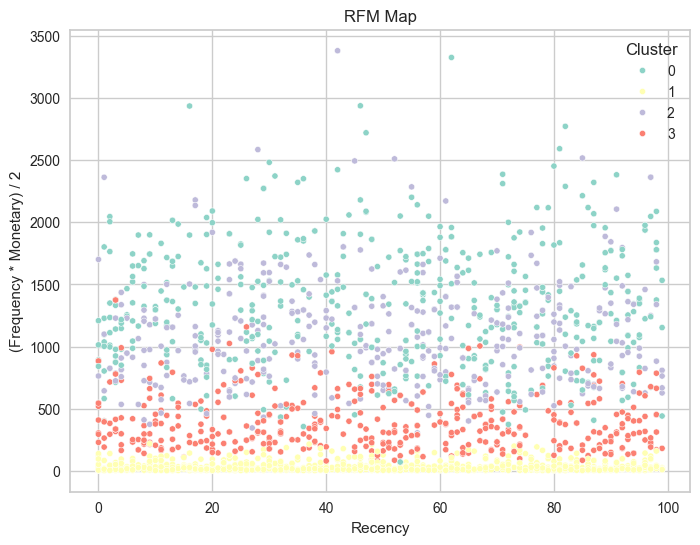

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='recency', y=((cleaned_df['frequency'] * cleaned_df['monetary']) / 2), hue='clusters', data=cleaned_df, palette='viridis', s=20)

plt.title('RFM Map')
plt.xlabel('Recency')
plt.ylabel('(Frequency * Monetary) / 2')
plt.legend(title='Cluster')
plt.show()

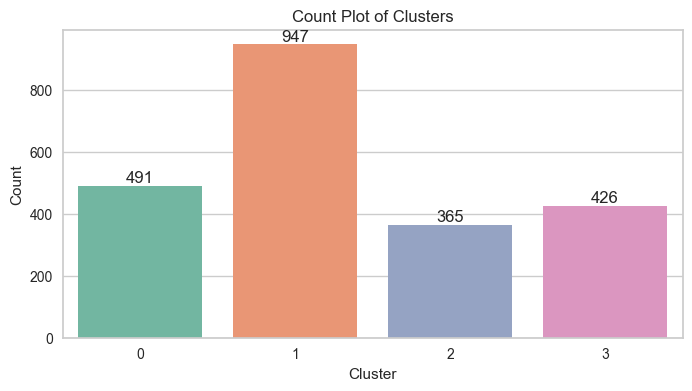

In [56]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='clusters', data=cleaned_df, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count Plot of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

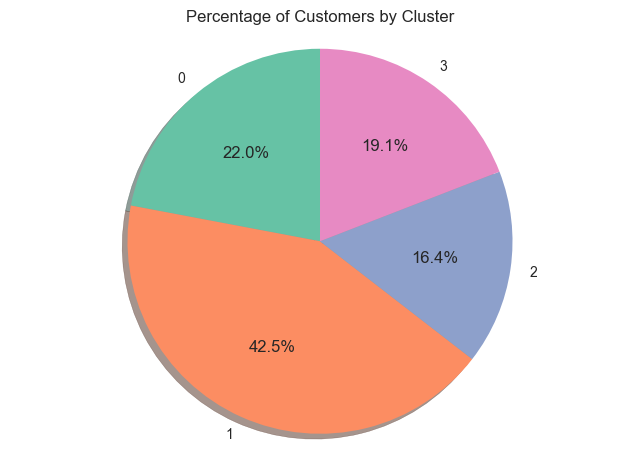

In [57]:
labels = '0', '1', '2', '3'
sizes = cleaned_df.groupby(['clusters'])['clusters'].count() / len(cleaned_df)*100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=sns.color_palette('Set2'))
ax1.axis('equal')

plt.title('Percentage of Customers by Cluster')
plt.show()

In [58]:
feats = ['education', 'income', 'frequency', 'monetary', 'recency', 'age', 'has_partner', 'children', 'num_web_visits_month']
grouped_clusters = df2.groupby(['clusters'])[feats].mean()
grouped_clusters

,education,income,frequency,monetary,recency,age,has_partner,children,num_web_visits_month
clusters,,,,,,,,,
0,1.232179,76842.303473,1.861399,1426.283096,50.309572,55.048880,0.602851,0.132383,2.533605
1,1.181626,33876.644157,0.675306,80.450898,48.991552,52.303062,0.643083,1.216473,6.388596
2,1.413699,64786.245902,2.125230,1034.200000,48.871233,59.293151,0.657534,0.942466,5.106849
3,1.370892,50758.028772,1.609226,459.568075,48.176056,57.842723,0.683099,1.316901,6.413146


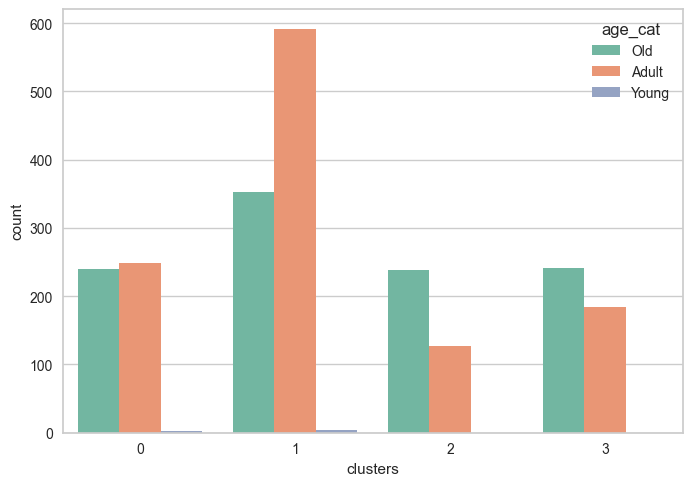

In [59]:
df2['age_cat'] = df2['age'].apply(lambda x: 'Young' if x < 30 else 'Adult' if x < 55 else 'Old')
sns.countplot(x='clusters', hue='age_cat', data=df2, palette='Set2')
plt.show()

**Cluster 0**

- Customers: 491;
- Avg. Income: $ 76,842.00;
- Avg. Total Spent: $ 1,426.00;
- Web Visits: Up to 3 visits per month;
- Children: Mostly without;
- Marital Status: Mostly with a partner, but not overwhelmingly so.
- Education: Mostly graduated, with some having completed postgraduate studies as well.
- Age: A mix of old and middle-aged people, but having some young.
- Recency: Highest.
- Frequency: High.

**Cluster 1**

- Customers: 947;
- Income: $ 33,876.00;
- Total Spent: $ 80.00;
- Web Visits: Up to 6 visits per month;
- Children: Predominantly has one child, and some having more;
- Marital Status: Mostly with a partner.
- Education: Mostly graduated, with some having completed postgraduate studies as well.
- Age: Commonly middle-aged people, and having the majority of young ones.
- Recency: High.
- Frequency: Lowest.

**Cluster 2**

- Customers: 365;
- Income: $ 64,786.00;
- Total Spent: $ 1034.00;
- Web Visits: Up to 5 visits per month;
- Children: Mostly with at least one child;
- Marital Status: Mostly with a partner.
- Education: At least graduated, with many having completed postgraduate studies as well.
- Age: Commonly old people.
- Recency: Low.
- Frequency: Highest.

**Cluster 3**

- Customers: 426;
- Income: $ 50,758.00;
- Total Spent: $ 459.00;
- Web Visits: Up to 7 visits per month;
- Children: Predominantly has one child, and many having more;
- Marital Status: Mostly with a partner.
- Education: At least graduated, with many having completed postgraduate studies as well.
- Age: A mix of old and middle-aged people.
- Recency: Lowest.
- Frequency: High.

#### Cluster Analysis - Purchases

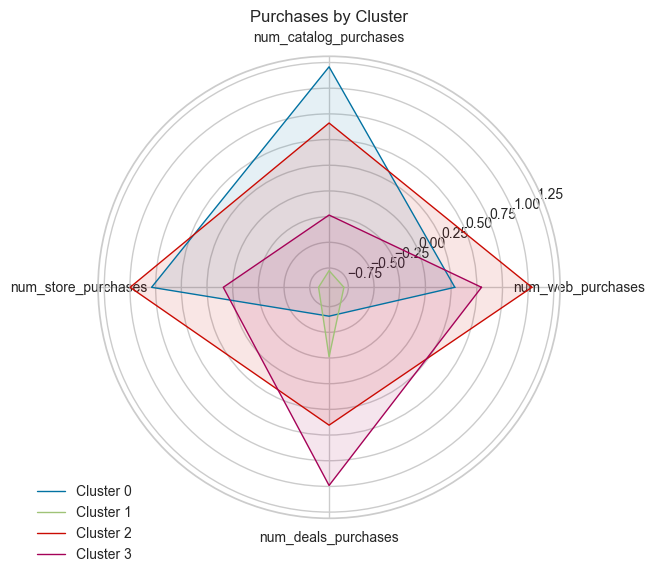

In [60]:
attributes = ['num_web_purchases', 'num_catalog_purchases', 'num_store_purchases', 'num_deals_purchases']
cluster_means = scaled_df.groupby('clusters')[attributes].mean().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Purchases by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

**Cluster 0.** Frequently makes purchases, with a strong preference for store and catalog shopping.

**Cluster 1.** Rarely makes purchases, showing a high preference for deals.

**Cluster 2.** Makes the highest number of purchases, without a strong preference for any specific shopping method.

**Cluster 3.** Often makes purchases, favoring deals and web shopping.

#### Cluster Analysis - Products

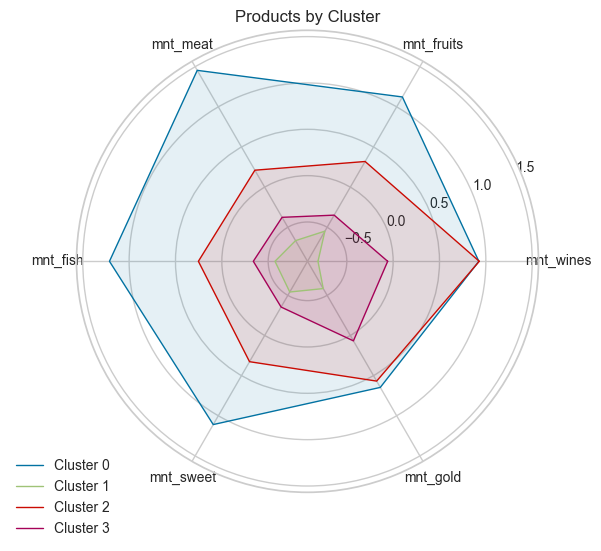

In [61]:
attributes = ['mnt_wines', 'mnt_fruits', 'mnt_meat', 'mnt_fish', 'mnt_sweet', 'mnt_gold']
cluster_means = scaled_df.groupby('clusters')[attributes].mean().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Products by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

**Cluster 0.** This group purchases a significant variety of all types of products.

**Cluster 1.** This group buys the fewest products, showing a slight preference for food and gold items.

**Cluster 2.** This group makes frequent purchases, preferring wines and gold items.

**Cluster 3.** This group makes a moderate number of purchases, also favoring wines and gold products.

#### Cluster Analysis - Campaings

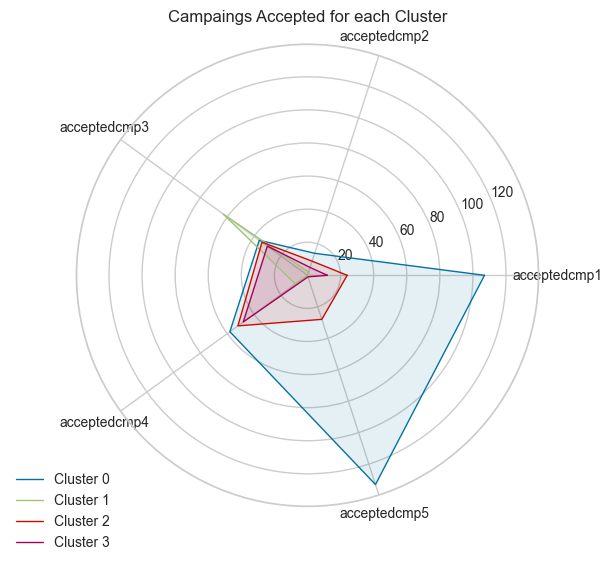

In [62]:
attributes = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5']
cluster_means = cleaned_df.groupby('clusters')[attributes].sum().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Campaings Accepted for each Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

**Cluster 0.** This group responded very well to campaigns 1 and 5.

**Cluster 1.** This group responded well to campaign 3.

**Cluster 2.** This group mostly responded to campaign 4, with slight responses to campaigns 3 and 5.

**Cluster 3.** This group mostly responded to campaigns 3 and 4.

#### Insights on Cluster Profiles:

##### Cluster 0 - "Prosperous Shoppers":

- Features the highest income and spending.
- Contains the smallest families, meaning that has no children.
- Mostly graduated, with some having completed postgraduate studies as well.
- Frequently makes purchases, with a strong preference for store and catalog shopping.
- Shows a significant expenditure on all types of products.
- Predominantly responds to campaign 1 and 5.
- A mix of old and middle-aged people, but having some young.
- Commonly don't use the web application.
- Recency: Highest.
- Frequency: High.

##### Cluster 1 - "Low Budget":

- Characterized by the lowest income and the lowest spending.
- Typically consists a small family.
- Mostly graduated, with a few having completed postgraduate studies as well.
- Rarely makes purchases, showing a high preference for deals.
- Purchases fewer products but shows a slight preference for food and gold products.
- Shows a low rate of campaign acceptance, with campaign 3 the most accepted.
- Commonly middle-aged people, and having the majority of young ones.
- Frequently uses the web application.
- Recency: High.
- Frequency: Lowest.

##### Cluster 2 - "Affluent Families":

- Exhibits the second highest income and spending.
- Typically consists of couples with one child.
- Mostly graduated, with many having completed postgraduate studies as well.
- Makes the highest number of purchases, without a strong preference for any specific shopping method.
- Shows significant expenditure for wines and gold items.
- Shows a low rate of campaign acceptance, with campaign 3 and 4 the most accepted.
- Commonly old people.
- Commonly don't use the web application.
- Recency: Low.
- Frequency: Highest.

##### Cluster 3 - "Web-Discount Seekers":

- Noted for the average income and spending.
- Comprises largest families.
- Mostly on graduated to postgraduate education levels.
- Often makes purchases, favoring deals and web shopping.
- Shows a decent expenditure with a preference over wines and gold products.
- Shows a low rate of campaign acceptance, with campaign 3 and 4 the most accepted.
- A mix of old and middle-aged people.
- Frequently uses the web application.
- Recency: Lowest.
- Frequency: High.

In [63]:
clusters_df = cleaned_df.copy()
clusters_df['clusters'].replace({0: 'Prosperous', 1: 'Low Budget', 
                                 2: 'Affluent Families', 3: 'Web-Discount Seekers'}, inplace=True)

Represent the influece of each to the total revenue of the company

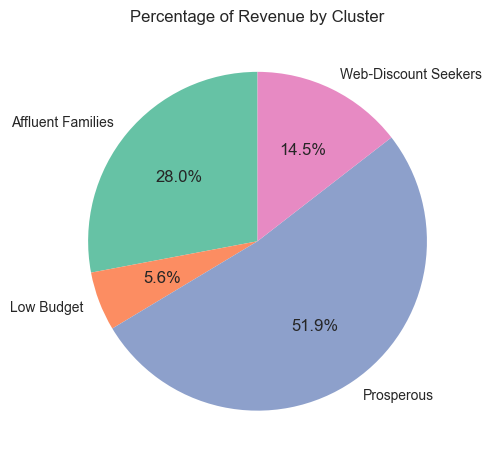

In [64]:
labels = 'Affluent Families', 'Low Budget', 'Prosperous', 'Web-Discount Seekers'
sizes = clusters_df.groupby(['clusters'])['monetary'].sum() / cleaned_df['monetary'].sum()*100

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

plt.title('Percentage of Revenue by Cluster')
plt.show()

Prosperous represents almost 51.9% of the total revenue. Adding the Affluent Families, they've 80% of total revenue.

Represent the frequency of each clusters comparing to the average value of all clusters.

In [65]:
clusters_df.groupby(['clusters'])['frequency'].mean() / cleaned_df['frequency'].mean()

clusters
Affluent Families       1.571346
Low Budget              0.499306
Prosperous              1.376275
Web-Discount Seekers    1.189824
Name: frequency, dtype: float64

Prosperous and Affluent Families are the ones that buys more frequently.

Represent the acceptance of each clusters comparing to the average value of all clusters.

In [66]:
clusters_df.groupby(['clusters'])['total_accepted_cmp'].mean() / cleaned_df['total_accepted_cmp'].mean()

clusters
Affluent Families       1.347908
Low Budget              0.265062
Prosperous              2.372103
Web-Discount Seekers    0.754219
Name: total_accepted_cmp, dtype: float64

Prosperous have the highest acceptance of marketing campaings.

### Loyalty Program

Ideally, our best customers for the loyalt program is the Cluster 0 - Prosperous Shoppers, 'cause they've
- a high income;
- buys a lot of products;
- represented 51.9% of the total revenue.
- responded well to campaings.

In [67]:
ids = df['ID']
loyalty_prog_df = clusters_df.copy()
loyalty_prog_df['ids'] = ids
loyalty_prog_df.loc[loyalty_prog_df['clusters'] == 'Prosperous', 'ids']

0        5524
12       2125
29       1966
34       8755
40       8601
        ...  
2201    10968
2203     2736
2207     4333
2211    10469
2218     4838
Name: ids, Length: 491, dtype: int64

In [68]:
size = len(loyalty_prog_df.loc[loyalty_prog_df['clusters'] == 'Prosperous'])
print(f'The Prosperous cluster has {size} customers.')

The Prosperous cluster has 491 customers.


### Financial Results

#### Presumptions
- I'll project the potential tangible financial outcomes of our loyalty program, which was created using consumer segmentation clustering modelling.
- Let's assume that the retail establishment can enhance the income of its Prosperous clientele by 15% by focused marketing efforts, customised merchandise, and exclusive deals.
- Since Prosperous and Affluent Families clients are comparable, let's estimate a 30% conversion rate for Prosperous customers.
- Assuming the following conversion rates to Prosperous, given that the other categories are more dissimilar from Prosperous customers: Web-Discount Seekers = 10% and Low Budget = 5%.

In [69]:
sample_idxs = loyalty_prog_df.loc[loyalty_prog_df['clusters'] == 'Affluent Families'].sample(frac=0.30).index
loyalty_prog_df.loc[sample_idxs, 'clusters'] = 'Prosperous'

sample_idxs = loyalty_prog_df.loc[loyalty_prog_df['clusters'] == 'Web-Discount Seekers'].sample(frac=0.1).index
loyalty_prog_df.loc[sample_idxs, 'clusters'] = 'Prosperous'

sample_idxs = loyalty_prog_df.loc[loyalty_prog_df['clusters'] == 'Low Budget'].sample(frac=0.05).index
loyalty_prog_df.loc[sample_idxs, 'clusters'] = 'Prosperous'

In [70]:
loyalty_prog_df['monetary'] = loyalty_prog_df.apply(lambda x: x['monetary'] * 1.15 if x['clusters'] == 'Prosperous' else x['monetary'], axis=1)
total_revenue_before = clusters_df['monetary'].sum()
total_revenue_after = loyalty_prog_df['monetary'].sum()

print(f'Total revenue before Prosperous loyalty program: ${round(total_revenue_before, 2):,.2f}.')
print(f'Total revenue after Prosperous loyalty program: ${round(total_revenue_after, 2):,.2f}')
print(f'Revenue increased by {round(((total_revenue_after - total_revenue_before)/total_revenue_before), 2)*100:.2f}%')
print(f'Revenue increased in ${round(total_revenue_after - total_revenue_before, 2):,.2f}.')

Total revenue before Prosperous loyalty program: $1,349,751.00.
Total revenue after Prosperous loyalty program: $1,475,442.45
Revenue increased by 9.00%
Revenue increased in $125,691.45.


### Conclusion

The loyalty program has the potential to increase the total store revenue by 9%, amounting to $125,691.45.